# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

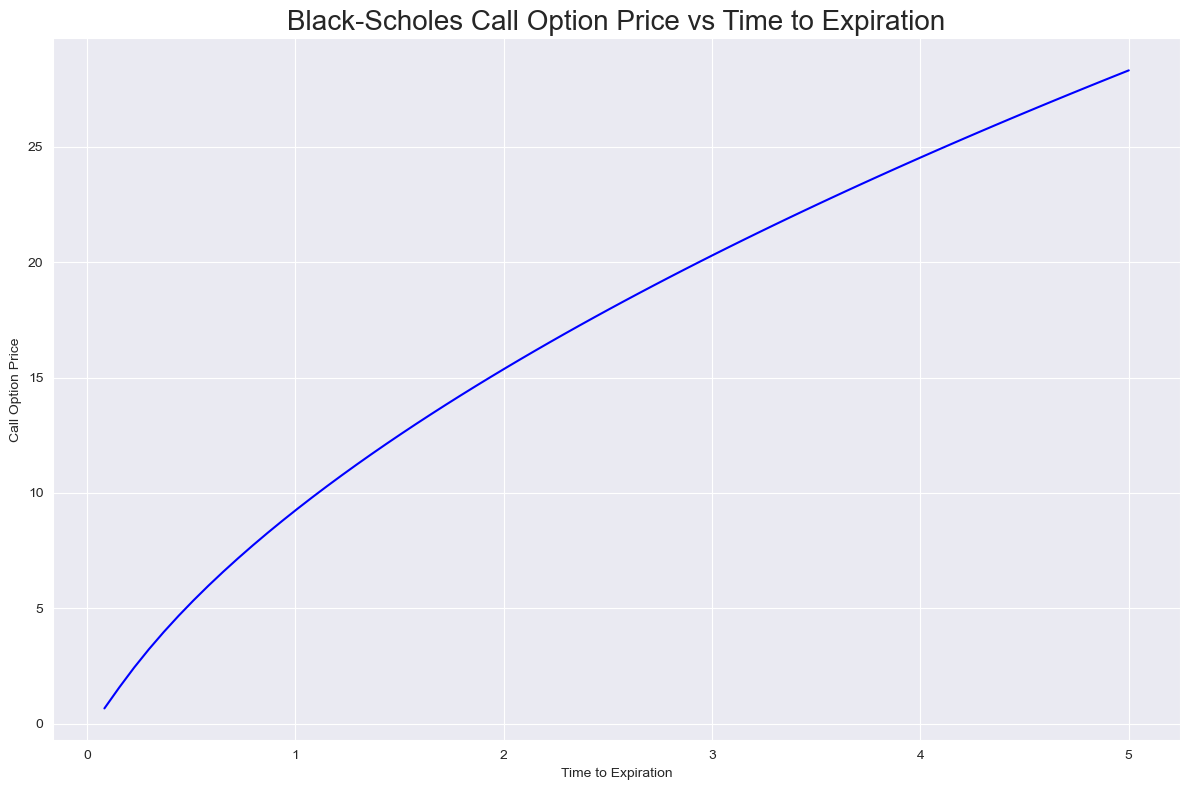

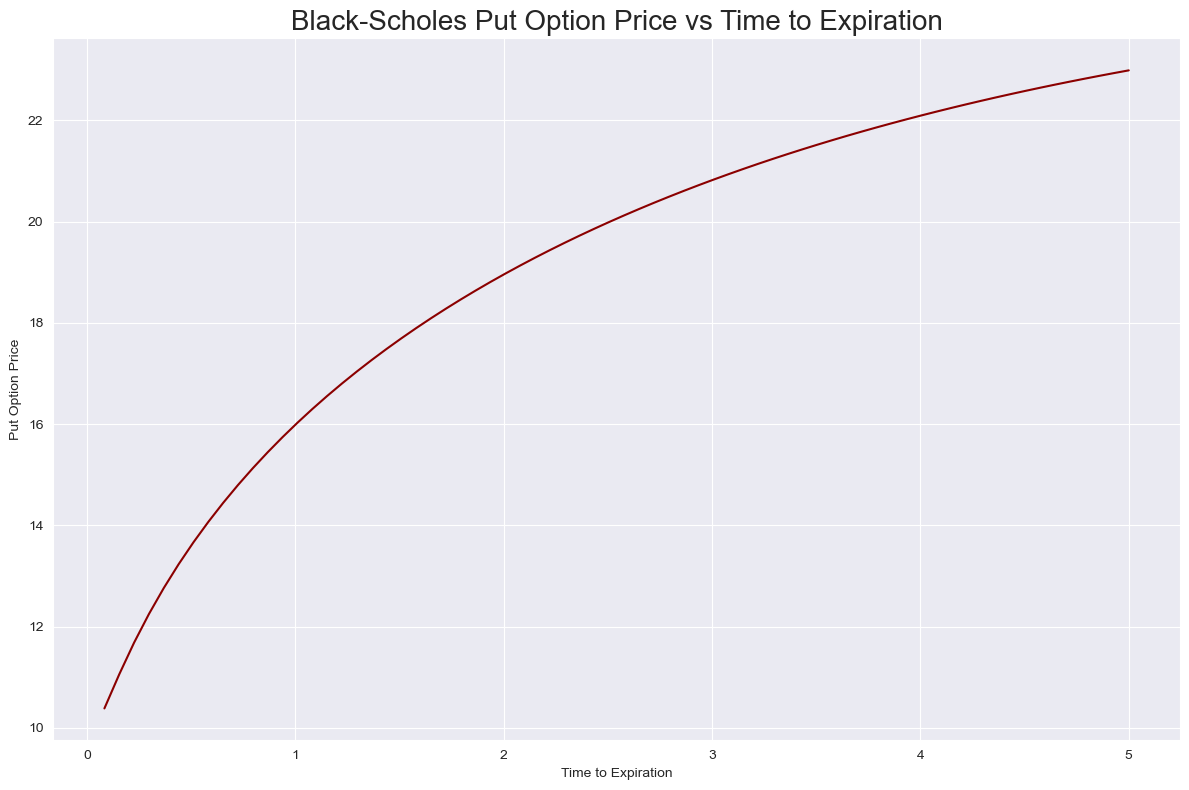

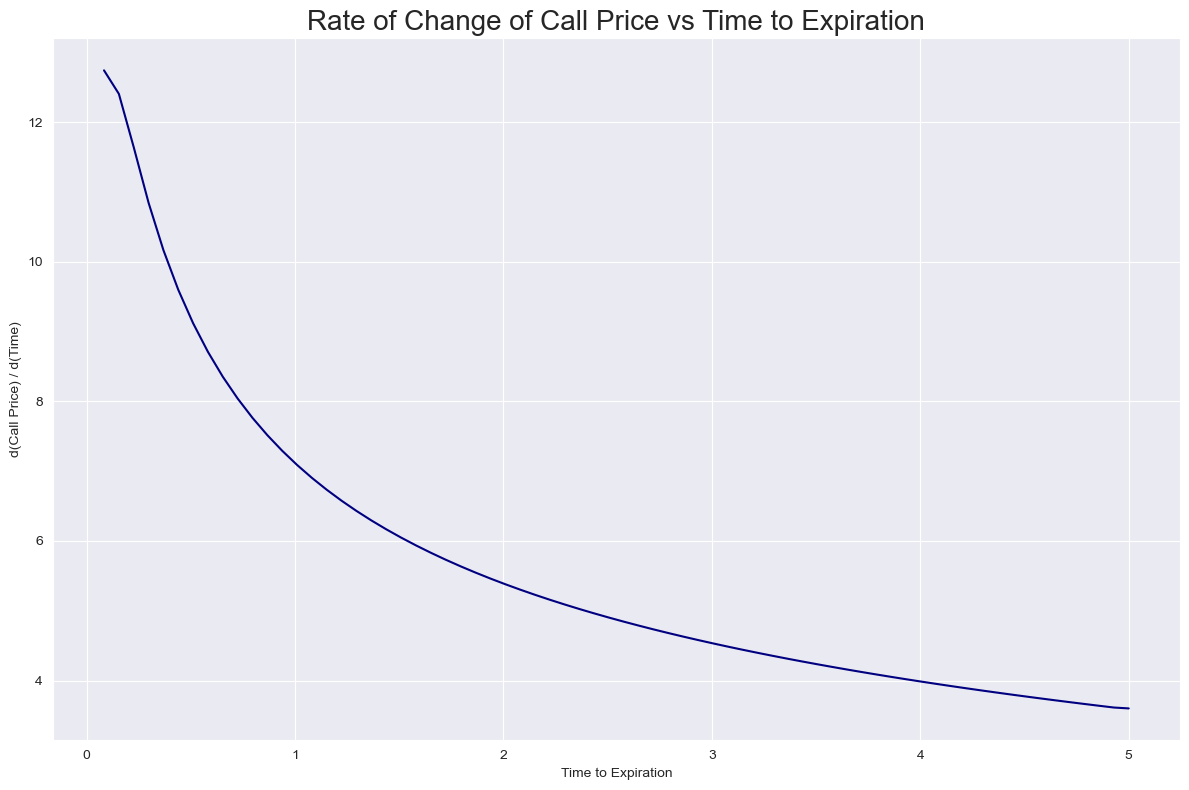

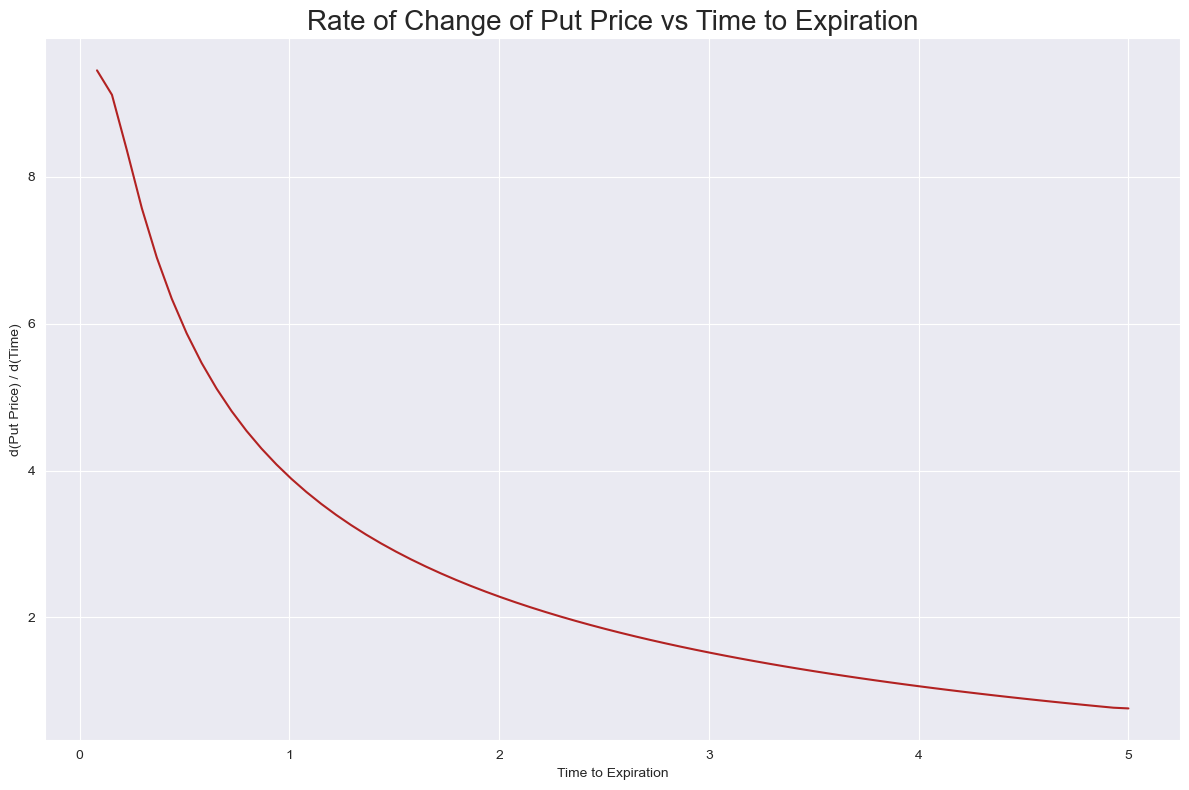

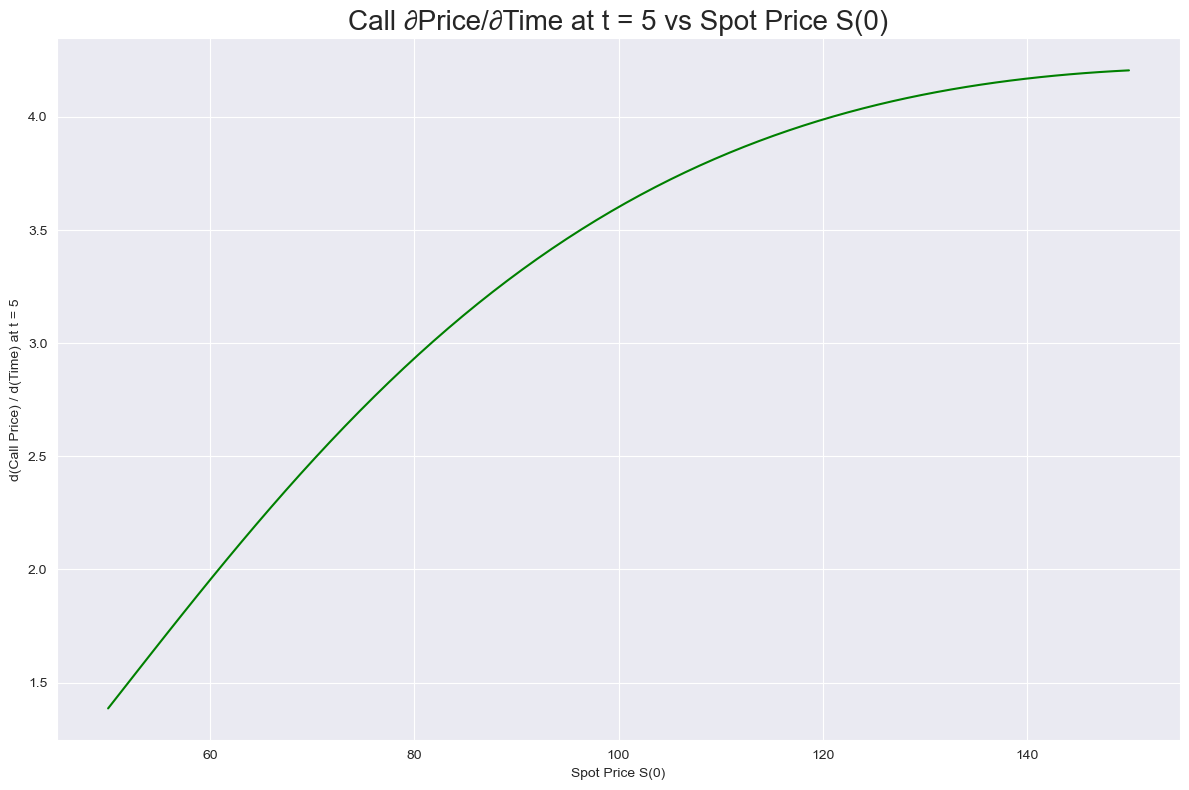

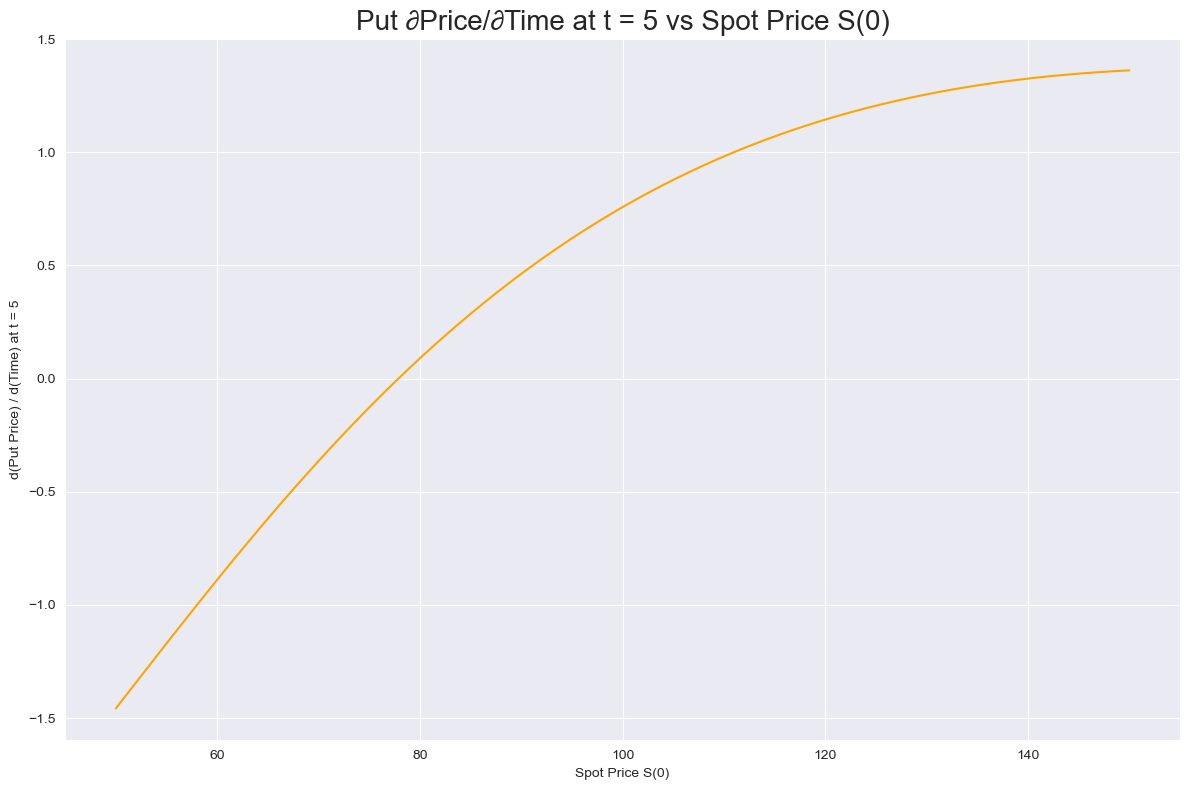

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

# --- Black-Scholes functions ---
def bs_call(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t)/(sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return S0 * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)

def bs_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*t)/(sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return -S0 * norm.cdf(-d1) + K * np.exp(-r*t) * norm.cdf(-d2)

# --- Parameters ---
S0 = 100
K = 110
sigma = 0.3
r = 0.03
times = np.linspace(1/12, 5, 70)
spots = np.linspace(50, 150, 70)

# === 1. Call price vs time ===
call_prices = [bs_call(S0, K, sigma, t=t, r=r) for t in times]

plt.figure(figsize=(12, 8))
plt.title('Black-Scholes Call Option Price vs Time to Expiration', fontsize=20)
plt.plot(times, call_prices, color='blue')
plt.xlabel('Time to Expiration')
plt.ylabel('Call Option Price')
plt.tight_layout()
plt.show()

# === 2. Put price vs time ===
put_prices = [bs_put(S0, K, sigma, t=t, r=r) for t in times]

plt.figure(figsize=(12, 8))
plt.title('Black-Scholes Put Option Price vs Time to Expiration', fontsize=20)
plt.plot(times, put_prices, color='darkred')
plt.xlabel('Time to Expiration')
plt.ylabel('Put Option Price')
plt.tight_layout()
plt.show()

# === 3. ∂Call/∂Time vs Time (fixed S0) ===
call_derivative = np.gradient(call_prices, times)

plt.figure(figsize=(12, 8))
plt.title('Rate of Change of Call Price vs Time to Expiration', fontsize=20)
plt.plot(times, call_derivative, color='navy')
plt.xlabel('Time to Expiration')
plt.ylabel('d(Call Price) / d(Time)')
plt.tight_layout()
plt.show()

# === 4. ∂Put/∂Time vs Time (fixed S0) ===
put_derivative = np.gradient(put_prices, times)

plt.figure(figsize=(12, 8))
plt.title('Rate of Change of Put Price vs Time to Expiration', fontsize=20)
plt.plot(times, put_derivative, color='firebrick')
plt.xlabel('Time to Expiration')
plt.ylabel('d(Put Price) / d(Time)')
plt.tight_layout()
plt.show()

# === 5. Call ∂Price/∂Time at t = 5 vs Spot Price S(0) ===
call_time_sensitivity_at_end = []

for S in spots:
    call_path = [bs_call(S, K, sigma, t=t, r=r) for t in times]
    dpath = np.gradient(call_path, times)
    call_time_sensitivity_at_end.append(dpath[-1])  # last time point

plt.figure(figsize=(12, 8))
plt.title('Call ∂Price/∂Time at t = 5 vs Spot Price S(0)', fontsize=20)
plt.plot(spots, call_time_sensitivity_at_end, color='green')
plt.xlabel('Spot Price S(0)')
plt.ylabel('d(Call Price) / d(Time) at t = 5')
plt.tight_layout()
plt.show()

# === 6. Put ∂Price/∂Time at t = 5 vs Spot Price S(0) ===
put_time_sensitivity_at_end = []

for S in spots:
    put_path = [bs_put(S, K, sigma, t=t, r=r) for t in times]
    dpath = np.gradient(put_path, times)
    put_time_sensitivity_at_end.append(dpath[-1])  # last time point

plt.figure(figsize=(12, 8))
plt.title('Put ∂Price/∂Time at t = 5 vs Spot Price S(0)', fontsize=20)
plt.plot(spots, put_time_sensitivity_at_end, color='orange')
plt.xlabel('Spot Price S(0)')
plt.ylabel('d(Put Price) / d(Time) at t = 5')
plt.tight_layout()
plt.show()


### Analysis of Black-Scholes Option Price Sensitivities

The visualizations show how European call and put option prices change with respect to time to expiration, and how their rates of change evolve as expiration approaches. We also analyze how that rate of change (the time derivative) behaves across different spot prices at a fixed long horizon (t = 5).

#### Call Option

The call price increases gradually as time to expiration increases. This may seem counterintuitive, as options are typically expected to lose value over time due to time decay. However, in this case the call is out-of-the-money (with the strike price above the spot), and the assumed volatility is relatively high. These two factors make the additional time valuable, since it increases the likelihood of the option becoming profitable. As time extends, the value continues to rise, but more slowly — indicating diminishing time value.

#### Put Option

The put option price also rises with more time to expiration, which aligns with expectations for an in-the-money put. With more time, there's a greater chance of maintaining or increasing profitability. The curve shows faster initial growth that levels off over time, as the additional benefit of time becomes less significant.

#### Time Derivative (∂Price/∂Time)

The time derivative represents the **rate at which an option's price changes as time progresses**. A negative value indicates the option is losing value (time decay), while a positive value means the option gains value with time.

In our earlier plots (now removed for brevity), we saw that this derivative:
- Starts more negative near expiration (steepest decay)
- Becomes less negative or flat as time increases

This reflects how most of the option’s time value is concentrated near the present. Once the expiration horizon extends far enough, the marginal benefit or loss from additional time becomes smaller.

#### Time Sensitivity at Expiration Horizon (t = 5)

The final set of plots shows how the time derivative at \( t = 5 \) behaves as a function of the initial spot price \( S(0) \).

- For the **call**, the time derivative is most negative when the spot is just below the strike — that’s when time has the highest value because the option is close to becoming profitable. As the spot increases and the call becomes deep in-the-money, time adds little and the derivative flattens.

- For the **put**, the pattern is mirrored. The most negative time sensitivity occurs just above the strike, where the put is slightly in-the-money. As the spot price drops further, the put becomes deep in-the-money, and again, time becomes less important.

In both cases, the maximum sensitivity to time occurs when the option is **near-the-money**. When the option is far in- or out-of-the-money, the value of time is diminished — either because the option is already almost certain to be exercised or to expire worthless.

#### Summary

Together, these results demonstrate how time affects both option value and the rate at which that value changes. The Black-Scholes model captures the intuition that time is most valuable when outcomes are uncertain — and that its effect tapers off once the outcome is essentially decided.
